In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv(r"C:\Users\dilee\OneDrive\Documents\insurance.csv")


# Settings
%matplotlib inline
sns.set(style="whitegrid")

In [15]:
# Replace 'insurance.csv' with your actual dataset file path
df = pd.read_csv(r"C:\Users\dilee\OneDrive\Documents\insurance.csv")

# Quick preview
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
df.info()
df.isnull().sum()
df.describe()
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [17]:
# Check unique values
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

# Convert to category type (if needed)
for col in ['sex', 'smoker', 'region']:
    df[col] = df[col].astype('category')


['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [18]:
# For now, create a copy with encoded values
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, drop_first=True)
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [19]:
df.describe(include='all')


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


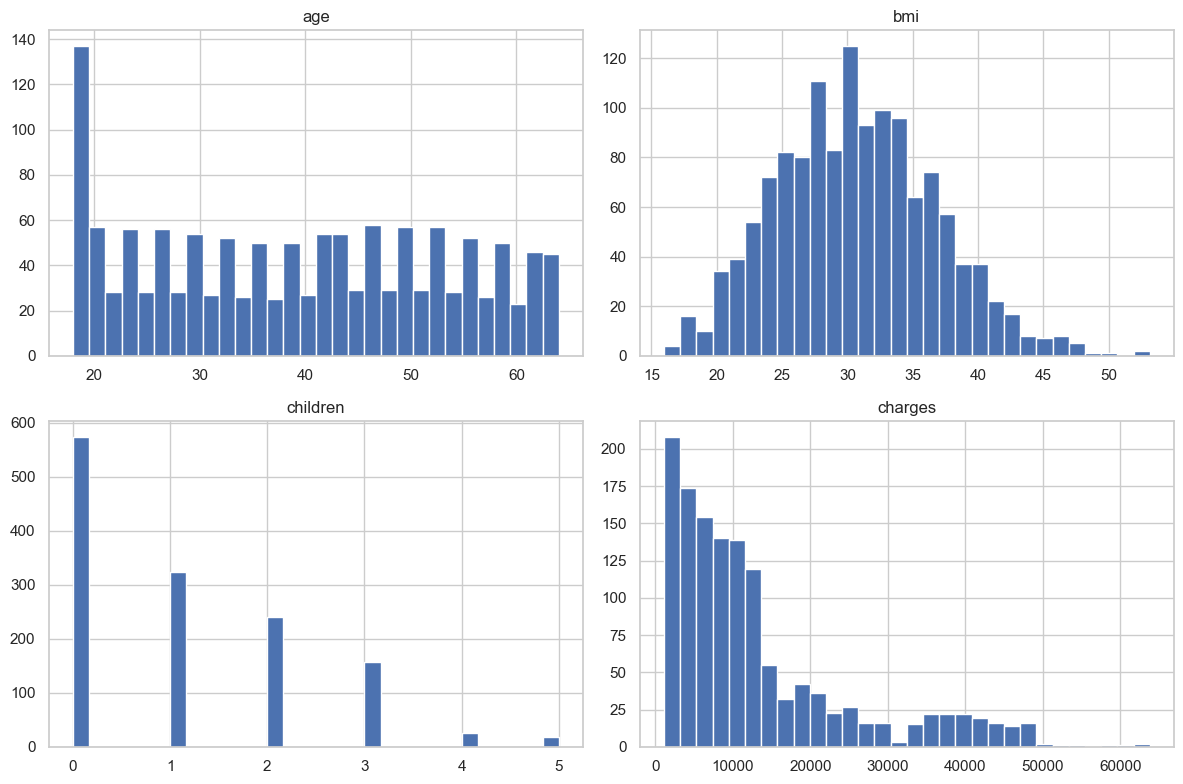

In [20]:
numerical_cols = ['age', 'bmi', 'children', 'charges']
df[numerical_cols].hist(bins=30, figsize=(12, 8))
plt.tight_layout()


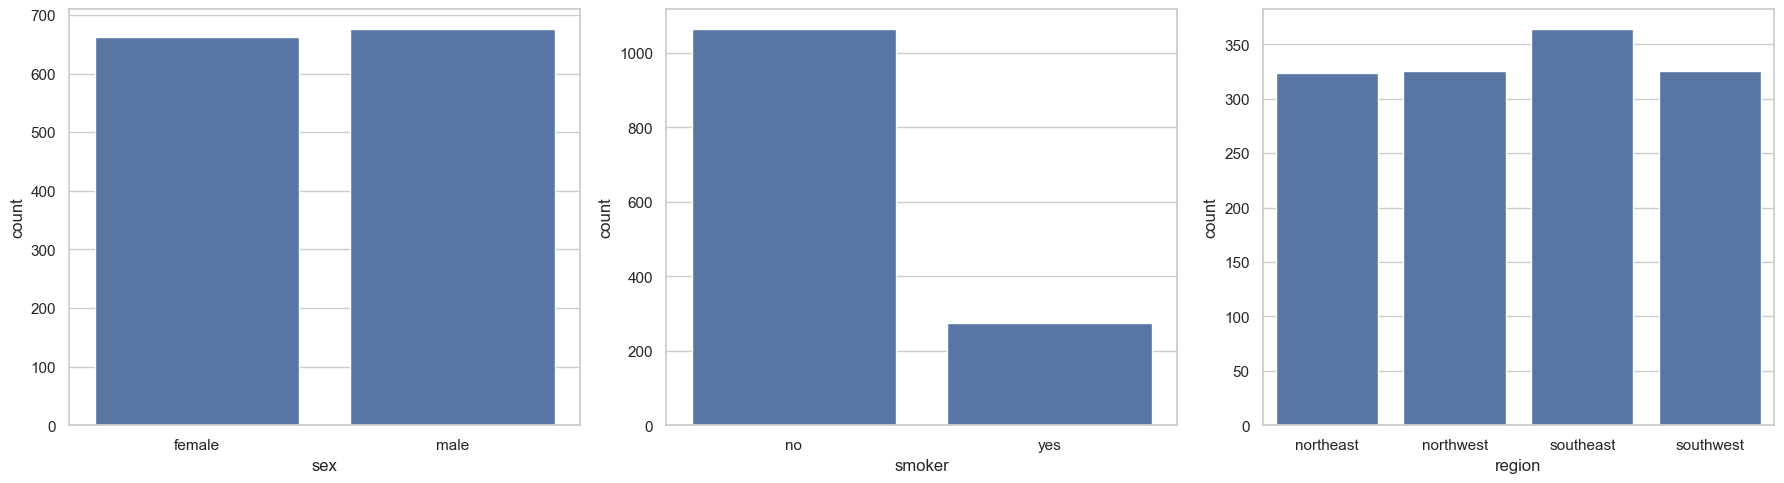

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='sex', data=df, ax=axs[0])
sns.countplot(x='smoker', data=df, ax=axs[1])
sns.countplot(x='region', data=df, ax=axs[2])
plt.tight_layout()


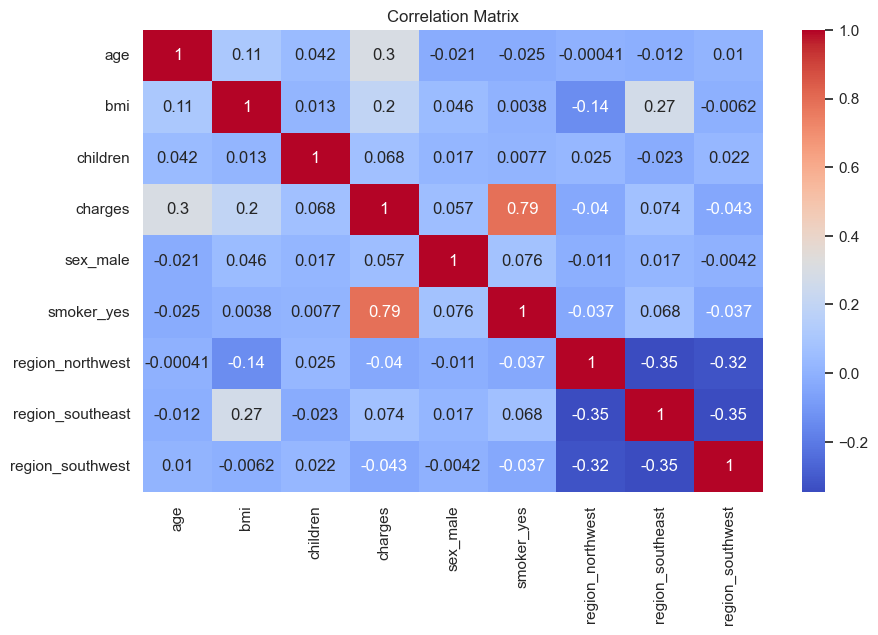

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


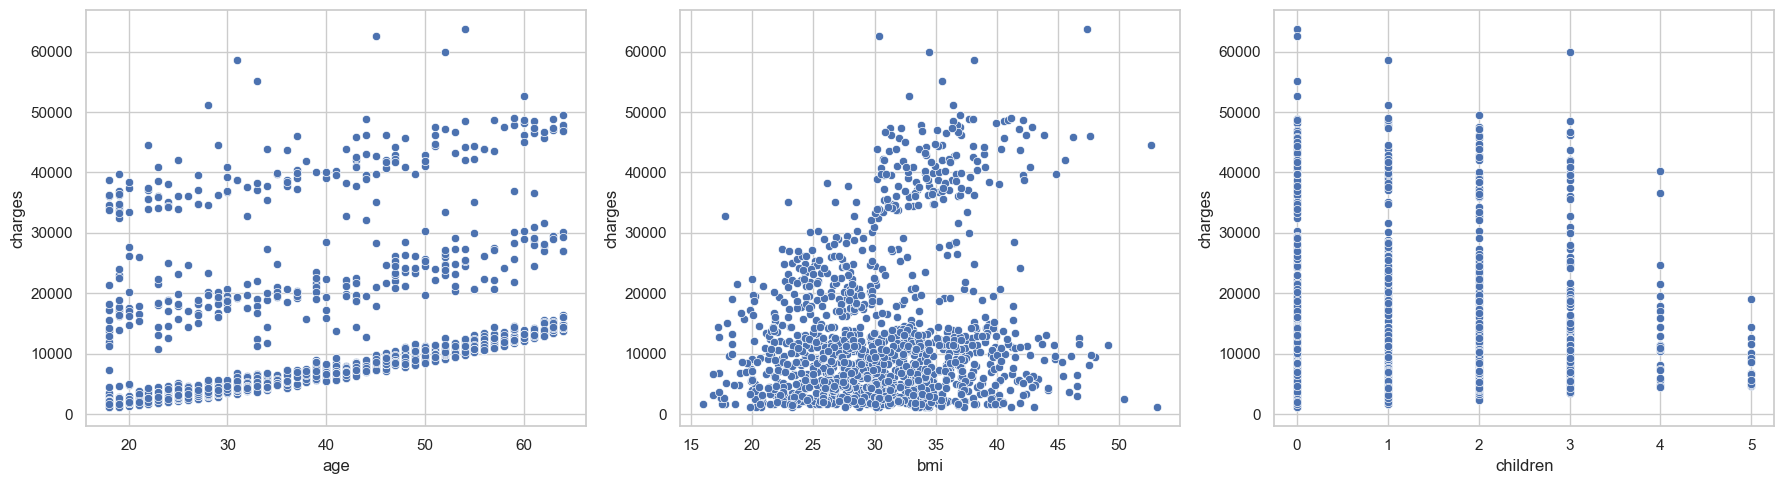

In [23]:
# Scatterplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(x='age', y='charges', data=df, ax=axs[0])
sns.scatterplot(x='bmi', y='charges', data=df, ax=axs[1])
sns.scatterplot(x='children', y='charges', data=df, ax=axs[2])
plt.tight_layout()


Text(0.5, 1.0, 'Insurance Charges by Smoking Status')

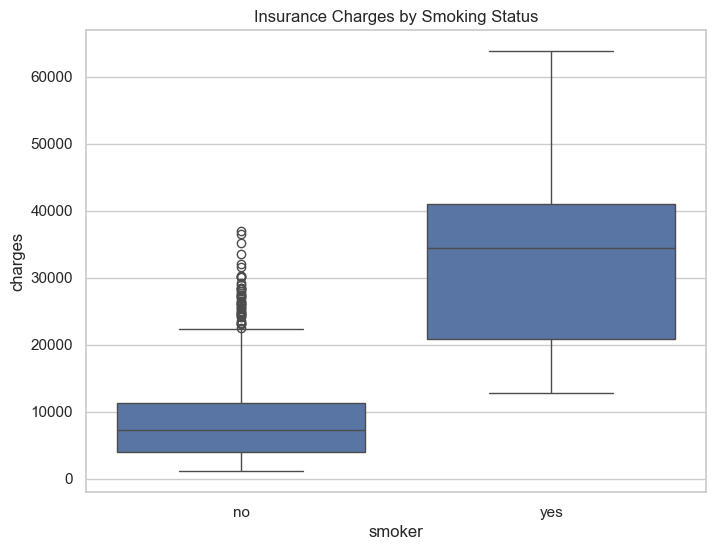

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Insurance Charges by Smoking Status')


Text(0.5, 1.0, 'Insurance Charges by Region')

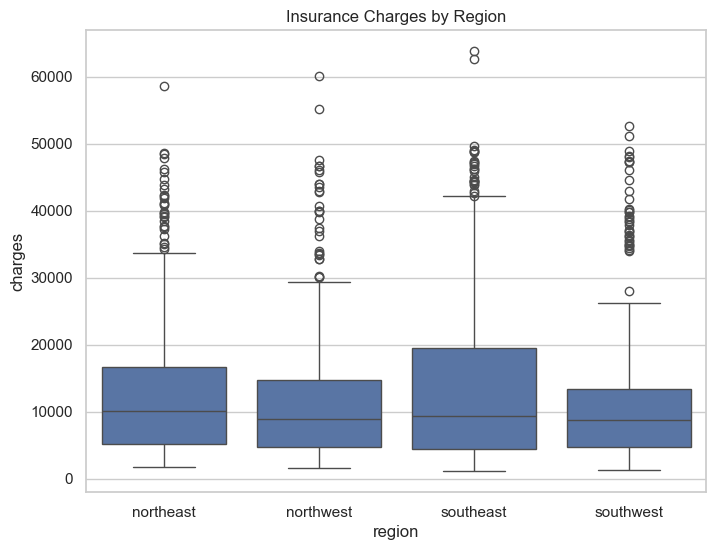

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Insurance Charges by Region')


In [26]:
fig = px.scatter(df, x='age', y='charges', color='smoker', size='bmi',
                 hover_data=['sex', 'children', 'region'])
fig.show()


Text(0.5, 1.0, 'Correlation Heatmap')

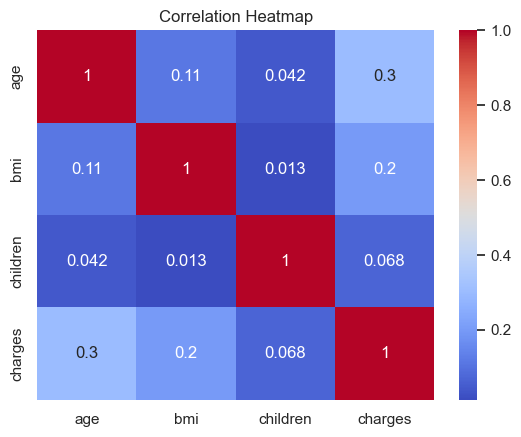

In [27]:
# Correlation matrix
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")


Text(0.5, 1.0, 'Charges by Sex')

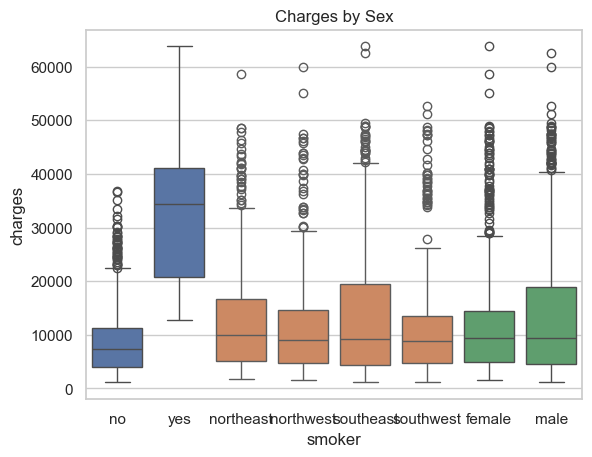

In [28]:
# Charges by smoking status
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges by Smoker Status")

# Charges by region
sns.boxplot(x='region', y='charges', data=df)
plt.title("Charges by Region")

# Charges by sex
sns.boxplot(x='sex', y='charges', data=df)
plt.title("Charges by Sex")


In [29]:
# Save the cleaned data
df.to_csv("cleaned_insurance.csv", index=False)
